In [1]:
#loading important library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading train and test datasets

train=pd.read_csv('../input/jobathon-august-2022/train_F3fUq2S.csv',index_col='campaign_id')
test=pd.read_csv('../input/jobathon-august-2022/test_Bk2wfZ3.csv',index_col='campaign_id')

In [4]:
#Viewing first 5 samples in train datasets

train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
3,3,59,12801,16,5,1,Noon,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
4,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
5,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 1 to 1888
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   object 
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_timer            1888 non-null   int64  
 15  is_emoticons        1888 non-null   int64  
 16  is_dis

In [6]:
# ckecking for null values

train.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

Data Visualization

<AxesSubplot:xlabel='click_rate', ylabel='Count'>

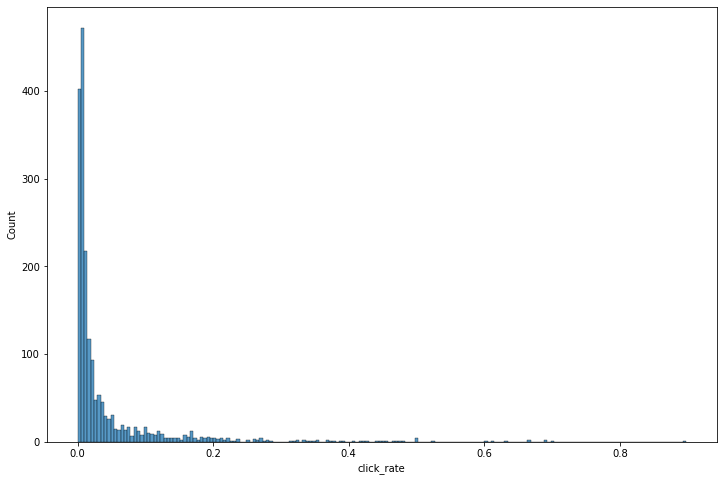

In [7]:
#visualing distribution of click rate(target variable)

sns.histplot(train['click_rate'])

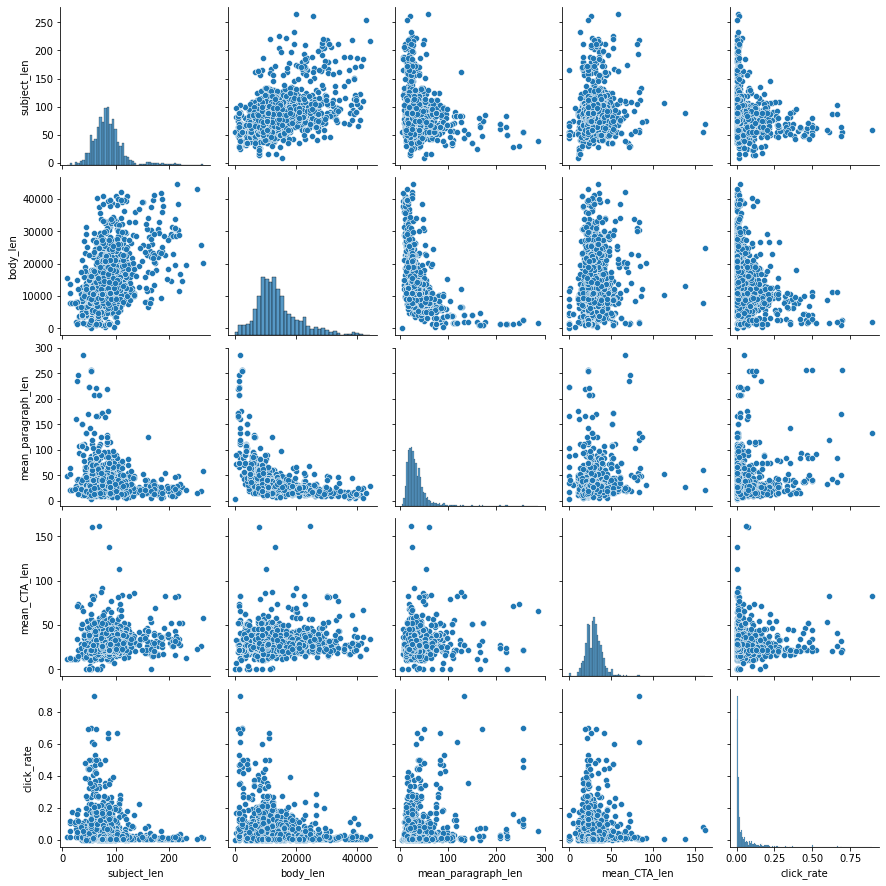

In [8]:
sns.pairplot(train[['subject_len', 'body_len', 'mean_paragraph_len','mean_CTA_len','click_rate']])

In [9]:
corr=train[['subject_len', 'body_len', 'mean_paragraph_len','mean_CTA_len','click_rate']].corr()

In [10]:
mask=np.triu(np.ones_like(corr))

<AxesSubplot:>

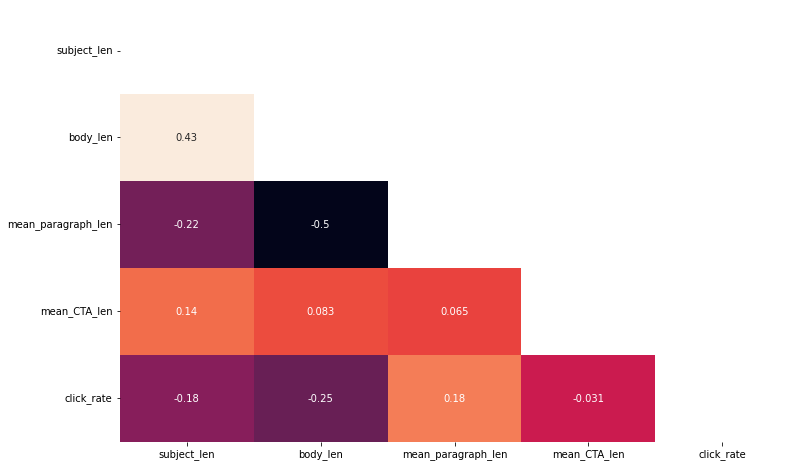

In [11]:
# checking correlation betwwen numerical feature and arget variable

sns.heatmap(corr,annot=True,mask=mask,cbar=False)

Data Cleaning

In [12]:
#checking for duplicate in the data

train.duplicated().any()

False

In [13]:
#checking no of unique values in each feature

train.nunique()

sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [14]:
#as is_timer is zero variance predictor dropping it, it is redundant variable

train.drop('is_timer',axis=1,inplace=True)
test.drop('is_timer',axis=1,inplace=True)

In [15]:
#is_price is binary variable but value counts shows its takes 7 unique value

train['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999])

In [16]:
# replacing price value with boolean value 1 indicating price is contained within email

train['is_price']=(train['is_price']!=0).astype('int')
test['is_price']=(test['is_price']!=0).astype('int')

In [17]:
#datatype of times_of_day is object, using get_dummies to convert it to numerical
#dropping first column to avoid collinearity

train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [18]:
#displaying the names of columns

train.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [19]:
#numerical features

numeric=['subject_len', 'body_len', 'mean_paragraph_len','mean_CTA_len']

In [20]:
#categorical features

categorical=['sender','day_of_week', 'is_weekend','times_of_day_Morning','times_of_day_Noon',
             'category','product','no_of_CTA', 'is_image', 'is_personalised', 'is_quote','is_emoticons',
             'is_discount','is_price', 'is_urgency','target_audience']

Imputation

In [21]:
#though there is no missing data in training, there can be in test dataset
#so using statistical measure to impute missing value

X_train=train.drop('click_rate',axis=1)
y_train=train['click_rate']

X_test=test

from sklearn.impute import SimpleImputer

imp_n=SimpleImputer(strategy='mean')
imp_n.fit(X_train[numeric])

train_n=imp_n.transform(X_train[numeric])
test_n=imp_n.transform(X_test[numeric])

imp_c=SimpleImputer(strategy='most_frequent')
imp_c.fit(X_train[categorical])

train_c=imp_c.transform(X_train[categorical])
test_c=imp_c.transform(X_test[categorical])

Standardization

In [22]:
# numerical features variables have different scales
#using minmax scaler to scale variables

from sklearn.preprocessing import MinMaxScaler

In [23]:
scale=MinMaxScaler()
scale.fit(train_n)

MinMaxScaler()

In [24]:
train_n=scale.transform(train_n)
test_n=scale.transform(test_n)

Feature Selection

In [25]:
#using feature selection to remove irrelevant variable from dataset

from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest

# importing metrics,models classes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

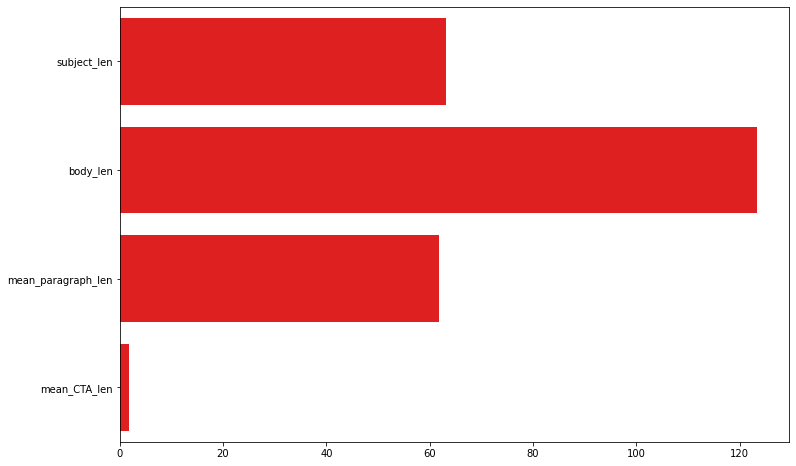

In [26]:
# calculating feature score for numerical variable using pearson statistics

fsn=SelectKBest(score_func=f_regression,k='all')
fsn.fit(train_n,train['click_rate'])

sns.barplot(x=fsn.scores_,y=numeric,color='red');

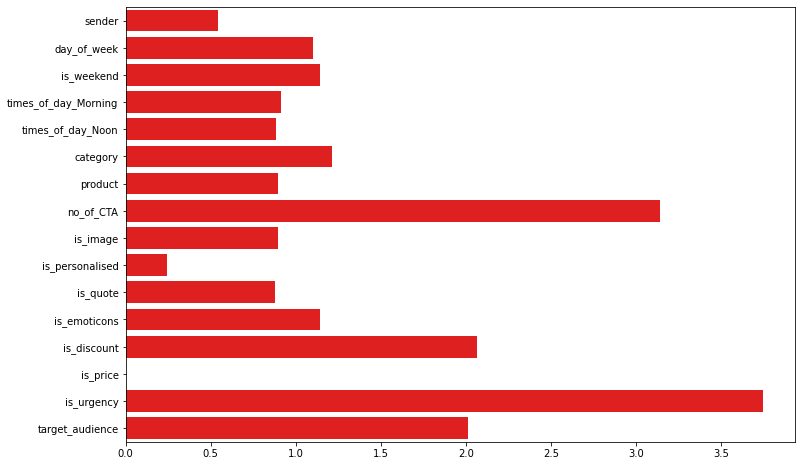

In [27]:
# calculating feature score for numerical variable using anova statistics

fsc=SelectKBest(score_func=f_classif,k='all')
fsc.fit(train_c,train['click_rate'])

sns.barplot(x=fsc.scores_,y=categorical,color='red');

In [28]:
#determing k best features by evaluting their performance and plotting bar plot

results=[]

for k in range(5,15):
    fsc=SelectKBest(score_func=f_classif,k=k)
    fsc.fit(train[categorical],train['click_rate'])

    train_c=fsc.transform(train[categorical])
    test_c=fsc.transform(test[categorical])
    
    X_train=np.concatenate((train_c,train_n),axis=1)
    X_test=np.concatenate((test_c,test_n),axis=1)
    y_train=train['click_rate'].values
    
    model=RandomForestRegressor()
    cv=RepeatedKFold(n_splits=3, n_repeats=10)
    scores=cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_mean_absolute_error')
    results.append(scores.mean())

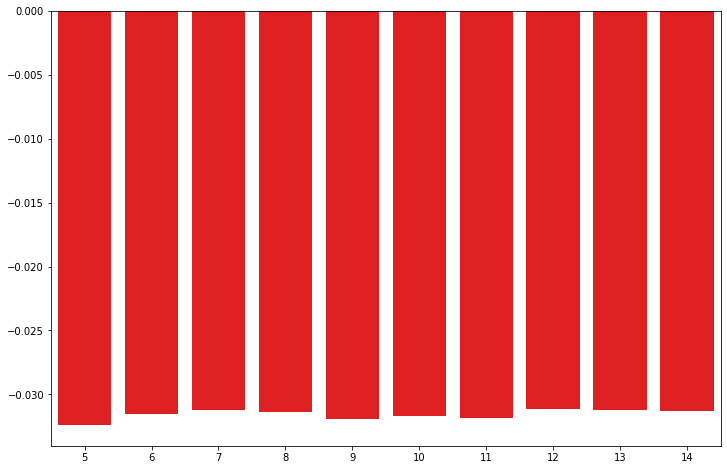

In [29]:
#score against k variable

sns.barplot(y=results,x=np.arange(5,15),color='red');

Modelling

In [30]:
# k=8 gives best performnance therefore we select k=10

fsc=SelectKBest(score_func=f_classif,k=10)
fsc.fit(train[categorical],train['click_rate'])

train_c=fsc.transform(train[categorical])
test_c=fsc.transform(test[categorical])
    
#concating numerical and categorical variable
X_train=np.concatenate((train_c,train_n),axis=1)
X_test=np.concatenate((test_c,test_n),axis=1)
y_train=train['click_rate'].values

In [31]:
parameters={'n_estimators':range(50,250,5),
              'max_depth':range(4,14)}

In [32]:
model=RandomForestRegressor()
grid=GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(4, 14),
                         'n_estimators': range(50, 250, 5)},
             scoring='neg_mean_absolute_error')

In [33]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 65}

In [34]:
grid.best_score_

-0.0401713775219664

In [35]:
model=grid.best_estimator_
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=65)

In [36]:
#using fitted model to predict click through rate on test datasets

y_test=model.predict(X_test)

In [37]:
# creting a dataframe to store result for each campaign id

sol=pd.DataFrame(y_test,columns=['click_rate'],index=test.index).reset_index()

In [38]:
submission=sol.to_csv('submissions.csv',index=False)